# Premiers Tests

In [131]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.cluster import KMeans
from nltk import WordNetLemmatizer
from nltk import word_tokenize
import spicy

In [28]:
with open('data/s/train_s.jsonl', 'r') as f:
  a = list(f)

data_s =[]
for element in a:
  data_s.append(json.loads(element))

data_s = pd.DataFrame(data_s)

In [29]:
data_s

,qID,sentence,option1,option2,answer
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2
...,...,...,...,...,...
635,3EGKVCRQFY6JSC139GVKMEMPGCSBY6-1,Carrie needed to be vigilant about her bone he...,Carrie,Natalie,1
636,3566S7OX5FXZ0UNAKACV3PPIOHJ17V-2,The waves destroyed the garage but left the ho...,garage,house,2
637,3566S7OX5FXZ0UNAKACV3PPIOHJ17V-1,The waves destroyed the garage but left the ho...,garage,house,1
638,3HEM8MA6H9AXTFCKHDKRCE03806PQT-1,The science student tried using the telescope ...,galaxy,telescope,1


### First metric : Clustering TDIDF

TF-IDF puis clustering KMeans sur données lemmatisées ou non
Clusters obtenus (n_cluster par défaut)
- ne sont pas pertinents (pas logique dans cluster)
- sont les mêmes selon lemmatisation ou pas
- plot de distortions, inerties : rien d'aboutissant

In [64]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data_s['sentence'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()

c:\users\marti\work\lattice-internship\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [65]:
df = pd.DataFrame(denselist, columns=feature_names)
df

,aaron,ability,able,about,above,abuse,accident,accidentally,accountant,achieving,...,written,wrote,yard,years,yellow,yet,yogurt,you,your,youtube
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.416204,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [81]:
clustering = KMeans()
clusters = clustering.fit_predict(df)
clusters

array([1, 0, 3, 3, 3, 3, 3, 3, 5, 5, 2, 2, 3, 3, 3, 3, 2, 2, 5, 5, 3, 3,
       1, 1, 3, 3, 5, 5, 6, 6, 7, 7, 3, 3, 6, 6, 3, 3, 0, 0, 5, 5, 3, 3,
       6, 6, 5, 5, 2, 2, 3, 3, 7, 7, 1, 1, 4, 4, 7, 7, 3, 3, 5, 5, 7, 7,
       0, 0, 3, 3, 2, 2, 4, 4, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 1, 1, 1, 1,
       2, 2, 3, 3, 5, 5, 0, 0, 1, 1, 6, 6, 1, 1, 1, 1, 2, 2, 3, 3, 5, 5,
       2, 2, 3, 3, 0, 0, 0, 0, 5, 5, 0, 0, 1, 1, 3, 3, 6, 6, 0, 0, 5, 5,
       2, 2, 5, 5, 5, 5, 7, 7, 3, 3, 3, 3, 4, 1, 3, 3, 7, 7, 0, 0, 3, 3,
       7, 3, 3, 3, 2, 2, 6, 6, 1, 1, 0, 0, 3, 3, 5, 5, 7, 7, 5, 5, 6, 6,
       3, 3, 2, 0, 2, 2, 1, 1, 7, 7, 2, 2, 6, 6, 5, 5, 5, 5, 7, 7, 3, 3,
       3, 3, 3, 3, 3, 3, 0, 0, 5, 5, 3, 3, 2, 2, 6, 6, 7, 7, 0, 0, 2, 2,
       1, 1, 2, 2, 0, 2, 5, 5, 3, 3, 3, 3, 7, 7, 0, 0, 7, 7, 5, 5, 3, 3,
       0, 0, 5, 5, 4, 4, 6, 6, 4, 4, 5, 5, 1, 6, 2, 2, 3, 3, 2, 2, 6, 6,
       5, 5, 7, 7, 0, 0, 5, 5, 7, 7, 6, 6, 2, 2, 6, 6, 2, 2, 4, 4, 5, 5,
       2, 2, 0, 0, 6, 6, 4, 4, 1, 1, 5, 5, 5, 5, 5,

In [84]:
df['Cluster'] = clusters

In [89]:
new_data_s = data_s

In [90]:
new_data_s['cluster'] = clusters

In [93]:
new_data_s[new_data_s['cluster']==0]['sentence']

1      Ian volunteered to eat Dennis's menudo after a...
38     Donald was richer than Leslie was because comp...
39     Donald was poorer than Leslie was because comp...
66     Once in Poland, Dennis enjoyed the trip more t...
67     Once in Poland, Dennis enjoyed the trip more t...
                             ...                        
548    Dennis had a much higher testosterone level th...
549    Dennis had a much higher testosterone level th...
588    Jason was bald, but Hunter had a full head of ...
589    Jason was bald, but Hunter had a full head of ...
602    They need to update their kitchen cabinets aft...
Name: sentence, Length: 68, dtype: object

In [ ]:
l = [0]
for i in range(1,len(df)):
  l.append(np.linalg.norm(df.iloc[0]-df.iloc[i]))

In [106]:
l2 = [0]
for i in range(1,len(df)):
  l2.append(np.dot(df.iloc[0],df.iloc[i])/(np.linalg.norm(df.iloc[0])*np.linalg.norm(df.iloc[0])))

In [101]:
len(l)

640

In [107]:
new_data_s['cos'] = l2

In [102]:
new_data_s['dist'] = l

In [108]:
new_data_s.sort_values('cos')['sentence']

0      Ian volunteered to eat Dennis's menudo after a...
419    Samantha won the dance competition over Jennif...
418    Samantha won the dance competition over Jennif...
120    Since Benjamin ate unhealthy desserts far more...
121    Since Benjamin ate unhealthy desserts far more...
                             ...                        
366    The police could escort the prisoner to the ga...
367    The police could escort the prisoner to the ga...
170    Jason denied Ian's passport application becaus...
171    Jason denied Ian's passport application becaus...
603    They need to update their kitchen cabinets aft...
Name: sentence, Length: 640, dtype: object

In [154]:
def sentence_lemmatizer(sentence):
  WNL = WordNetLemmatizer()
  lemmatized=[]
  for word in word_tokenize(sentence):
    if word.isalpha():
      lemms = [WNL.lemmatize(word,pos=f'{param}') for param in ['v','n','a','r','s']]
      ind = np.argmin([len(lemm) for lemm in lemms])
      lemmatized.append(lemms[ind])
  return ' '.join(lemmatized)

In [155]:
word_tokenize('I was there, like three days ago.')[0]

'I'

In [159]:
sentence_lemmatizer('I was there, like three days ago.')

'I be there like three day ago'

In [160]:
data_s['lemmatized_sentence'] = data_s['sentence'].apply(sentence_lemmatizer)

In [161]:
data_s

,qID,sentence,option1,option2,answer,cluster,dist,cos,lemmatized_sentence
0,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-2,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,2,1,0.000000,0.000000,Ian volunteer to eat Dennis menudo after alrea...
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,0,1.093915,0.450838,Ian volunteer to eat Dennis menudo after alrea...
2,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-1,"He never comes to my home, but I always go to ...",home,house,1,3,2.438387,1.513567,He never come to my home but I always go to hi...
3,3XWUWJ18TLO2DDRXF83QWLKRJ29UU4-2,"He never comes to my home, but I always go to ...",home,house,2,3,2.438350,1.513613,He never come to my home but I always go to hi...
4,3D5G8J4N5CI2K40F4RZLF9OG2CKVTH-2,"Kyle doesn't wear leg warmers to bed, while Lo...",Kyle,Logan,2,3,2.444387,1.506243,Kyle do wear leg warmer to bed while Logan alm...
...,...,...,...,...,...,...,...,...,...
635,3EGKVCRQFY6JSC139GVKMEMPGCSBY6-1,Carrie needed to be vigilant about her bone he...,Carrie,Natalie,1,4,3.314652,2.003270,Carrie need to be vigilant about her bone heal...
636,3566S7OX5FXZ0UNAKACV3PPIOHJ17V-2,The waves destroyed the garage but left the ho...,garage,house,2,2,1.726925,1.004433,The wave destroy the garage but left the house...
637,3566S7OX5FXZ0UNAKACV3PPIOHJ17V-1,The waves destroyed the garage but left the ho...,garage,house,1,2,1.722420,1.008317,The wave destroy the garage but left the house...
638,3HEM8MA6H9AXTFCKHDKRCE03806PQT-1,The science student tried using the telescope ...,galaxy,telescope,1,7,6.163174,3.503820,The science student try use the telescope to s...


In [163]:
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(data_s['lemmatized_sentence'])
feature_names = vectorizer.get_feature_names()
dense = vectors.todense()
denselist = dense.tolist()
df2 = pd.DataFrame(denselist,columns=feature_names)
df2

c:\users\marti\work\lattice-internship\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,ability,able,about,above,abuse,accident,accidentally,accountant,achieve,...,write,writer,yard,year,yellow,yet,yogurt,you,your,youtube
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,0.0,0.0,0.0,0.432549,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
636,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
637,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [164]:
clustering = KMeans()
clusters = clustering.fit_predict(df)
clusters

array([4, 0, 2, 2, 2, 2, 2, 2, 1, 1, 5, 5, 2, 2, 2, 2, 5, 5, 1, 1, 2, 2,
       4, 4, 2, 2, 1, 1, 3, 3, 6, 6, 2, 2, 3, 3, 2, 2, 0, 0, 1, 1, 2, 2,
       3, 3, 1, 1, 5, 5, 2, 2, 6, 6, 4, 4, 7, 7, 6, 6, 2, 2, 1, 1, 6, 6,
       0, 0, 2, 2, 5, 5, 7, 7, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 4, 4, 4, 4,
       5, 5, 2, 2, 1, 1, 0, 0, 4, 4, 3, 3, 4, 4, 4, 4, 5, 5, 2, 2, 1, 1,
       5, 5, 2, 2, 0, 0, 0, 0, 1, 1, 0, 0, 4, 4, 2, 2, 3, 3, 0, 0, 1, 1,
       5, 5, 1, 1, 1, 1, 6, 6, 2, 2, 2, 2, 7, 4, 2, 2, 6, 6, 0, 0, 2, 2,
       6, 2, 2, 2, 5, 5, 3, 3, 4, 4, 0, 0, 2, 2, 1, 1, 6, 6, 1, 1, 3, 3,
       2, 2, 5, 0, 5, 5, 4, 4, 6, 6, 5, 5, 3, 3, 1, 1, 1, 1, 6, 6, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 0, 1, 1, 2, 2, 5, 5, 3, 3, 6, 6, 0, 0, 5, 5,
       4, 4, 5, 5, 0, 5, 1, 1, 2, 2, 2, 2, 6, 6, 0, 0, 6, 6, 1, 1, 2, 2,
       0, 0, 1, 1, 7, 7, 3, 3, 7, 7, 1, 1, 4, 3, 5, 5, 2, 2, 5, 5, 3, 3,
       1, 1, 6, 6, 0, 0, 1, 1, 6, 6, 3, 3, 5, 5, 3, 3, 5, 5, 7, 7, 1, 1,
       5, 5, 0, 0, 3, 3, 7, 7, 4, 4, 1, 1, 1, 1, 1,

In [166]:
data_s['cluster2']= clusters

In [168]:
data_s[data_s['cluster']==0]

,qID,sentence,option1,option2,answer,cluster,dist,cos,lemmatized_sentence,cluster2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,0,1.093915,0.450838,Ian volunteer to eat Dennis menudo after alrea...,0
38,38G0E1M85OJHKHF44WPVK5AIL6SUV4-1,Donald was richer than Leslie was because comp...,Donald,Leslie,1,0,1.726564,0.004744,Donald be rich than Leslie be because company ...,0
39,38G0E1M85OJHKHF44WPVK5AIL6SUV4-2,Donald was poorer than Leslie was because comp...,Donald,Leslie,2,0,1.726564,0.004744,Donald be poor than Leslie be because company ...,0
66,39WSF6KUV2JQBCAETMCCTX6ZAD1OEF-2,"Once in Poland, Dennis enjoyed the trip more t...",Dennis,Jason,2,0,1.698734,0.028576,Once in Poland Dennis enjoy the trip more than...,0
67,39WSF6KUV2JQBCAETMCCTX6ZAD1OEF-1,"Once in Poland, Dennis enjoyed the trip more t...",Dennis,Jason,1,0,1.698734,0.028576,Once in Poland Dennis enjoy the trip more than...,0
...,...,...,...,...,...,...,...,...,...,...
548,39TX062QX1MAVN895TICTJTVVXM3XO-2,Dennis had a much higher testosterone level th...,Dennis,Christopher,2,0,1.696011,0.030887,Dennis had a much high testosterone level than...,0
549,39TX062QX1MAVN895TICTJTVVXM3XO-1,Dennis had a much higher testosterone level th...,Dennis,Christopher,1,0,1.698054,0.029153,Dennis had a much high testosterone level than...,0
588,3OEWW2KGQJ9LJ6WEXR1SNFOEAZPDOW-1,"Jason was bald, but Hunter had a full head of ...",Jason,Hunter,1,0,1.728109,0.003410,Jason be bald but Hunter had a full head of ha...,0
589,3OEWW2KGQJ9LJ6WEXR1SNFOEAZPDOW-2,"Jason was bald, but Hunter had a full head of ...",Jason,Hunter,2,0,1.727867,0.003619,Jason be bald but Hunter had a full head of ha...,0


In [167]:
data_s[data_s['cluster2']==0]

,qID,sentence,option1,option2,answer,cluster,dist,cos,lemmatized_sentence,cluster2
1,3QHITW7OYO7Q6B6ISU2UMJB84ZLAQE-1,Ian volunteered to eat Dennis's menudo after a...,Ian,Dennis,1,0,1.093915,0.450838,Ian volunteer to eat Dennis menudo after alrea...,0
38,38G0E1M85OJHKHF44WPVK5AIL6SUV4-1,Donald was richer than Leslie was because comp...,Donald,Leslie,1,0,1.726564,0.004744,Donald be rich than Leslie be because company ...,0
39,38G0E1M85OJHKHF44WPVK5AIL6SUV4-2,Donald was poorer than Leslie was because comp...,Donald,Leslie,2,0,1.726564,0.004744,Donald be poor than Leslie be because company ...,0
66,39WSF6KUV2JQBCAETMCCTX6ZAD1OEF-2,"Once in Poland, Dennis enjoyed the trip more t...",Dennis,Jason,2,0,1.698734,0.028576,Once in Poland Dennis enjoy the trip more than...,0
67,39WSF6KUV2JQBCAETMCCTX6ZAD1OEF-1,"Once in Poland, Dennis enjoyed the trip more t...",Dennis,Jason,1,0,1.698734,0.028576,Once in Poland Dennis enjoy the trip more than...,0
...,...,...,...,...,...,...,...,...,...,...
548,39TX062QX1MAVN895TICTJTVVXM3XO-2,Dennis had a much higher testosterone level th...,Dennis,Christopher,2,0,1.696011,0.030887,Dennis had a much high testosterone level than...,0
549,39TX062QX1MAVN895TICTJTVVXM3XO-1,Dennis had a much higher testosterone level th...,Dennis,Christopher,1,0,1.698054,0.029153,Dennis had a much high testosterone level than...,0
588,3OEWW2KGQJ9LJ6WEXR1SNFOEAZPDOW-1,"Jason was bald, but Hunter had a full head of ...",Jason,Hunter,1,0,1.728109,0.003410,Jason be bald but Hunter had a full head of ha...,0
589,3OEWW2KGQJ9LJ6WEXR1SNFOEAZPDOW-2,"Jason was bald, but Hunter had a full head of ...",Jason,Hunter,2,0,1.727867,0.003619,Jason be bald but Hunter had a full head of ha...,0


In [170]:
distortions = []
inertias = []
from scipy.spatial.distance import cdist
K = range(1, 10)

for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(df2)
    kmeanModel.fit(df2)

    distortions.append(sum(np.min(cdist(df2, kmeanModel.cluster_centers_,'euclidean'), axis=1)) / df2.shape[0])
    inertias.append(kmeanModel.inertia_)

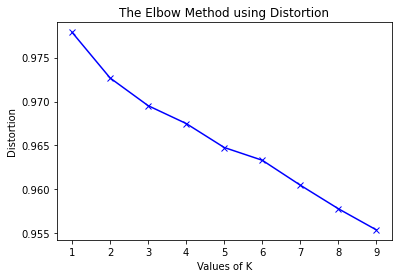

In [171]:
plt.plot(K, distortions, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Distortion')
plt.title('The Elbow Method using Distortion')
plt.show()

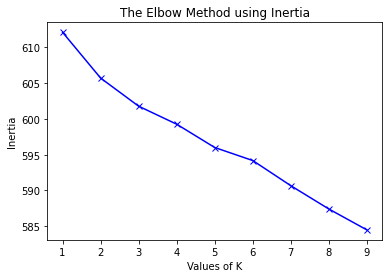

In [172]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()